# Import Libraries, Mount Data and Analyze Data

In [2]:
# The dependent libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk

# Mount your G-Drive

from google.colab import drive
drive.mount('/content/drive')

# read the dataset
loan_data =pd.read_csv("/content/drive/MyDrive/data/loan.csv")
loan_data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.shape

(614, 13)

In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Identify Target Variable

---



In [6]:
# Target Variable Unique Values
loan_data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [7]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# Target Variable Normalize
loan_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

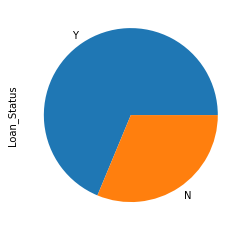

In [9]:
loan_data['Loan_Status'].value_counts().plot.pie()

Analyze the Dataset

---



**Univariate Analysis**

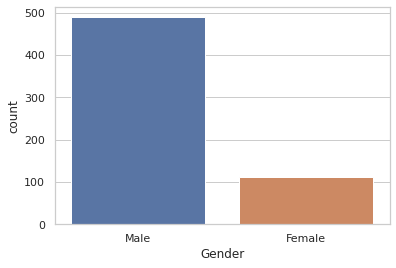

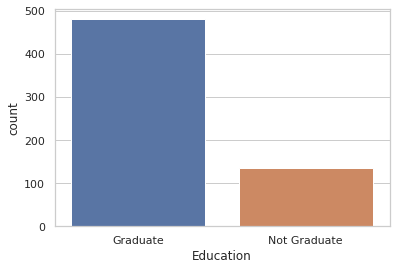

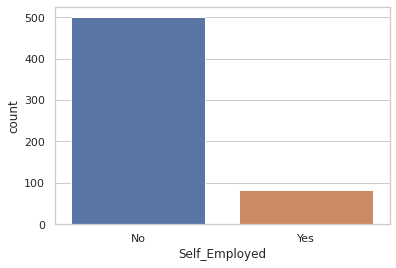

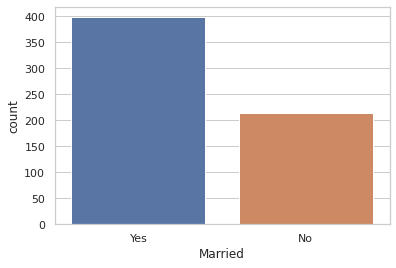

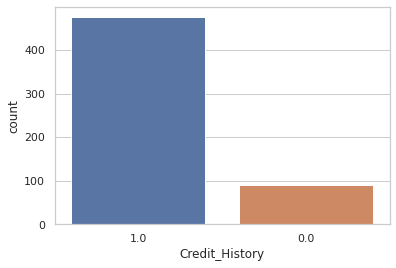

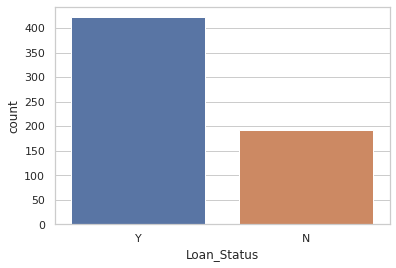

In [10]:
# categorical - Independent variable

sns.set_theme(style="whitegrid")

count = sns.countplot(data= loan_data, x= 'Gender', order= loan_data['Gender'].value_counts().index)
plt.show()
count = sns.countplot(data= loan_data, x= 'Education', order= loan_data['Education'].value_counts().index)
plt.show()
count = sns.countplot(data= loan_data, x= 'Self_Employed', order= loan_data['Self_Employed'].value_counts().index)
plt.show()
count = sns.countplot(data= loan_data, x= 'Married', order= loan_data['Married'].value_counts().index)
plt.show()
count = sns.countplot(data= loan_data, x= 'Credit_History', order= loan_data['Credit_History'].value_counts().index)
plt.show()
count = sns.countplot(data= loan_data, x= 'Loan_Status', order= loan_data['Loan_Status'].value_counts().index)
plt.show()

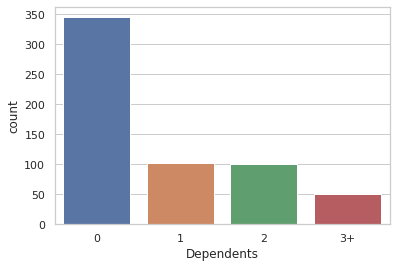

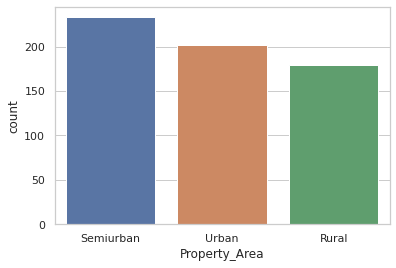

In [11]:
# Ordinal Field analysis

sns.set_theme(style="whitegrid")

count = sns.countplot(data= loan_data, x= 'Dependents', order= loan_data['Dependents'].value_counts().index)
plt.show()
count = sns.countplot(data= loan_data, x= 'Property_Area', order= loan_data['Property_Area'].value_counts().index)
plt.show()

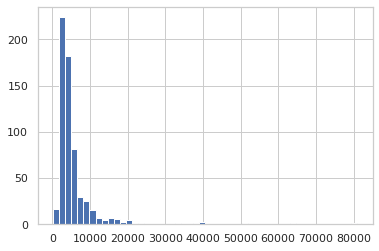

In [12]:
# Numerical Analysis

loan_data['ApplicantIncome'].hist(bins=50)

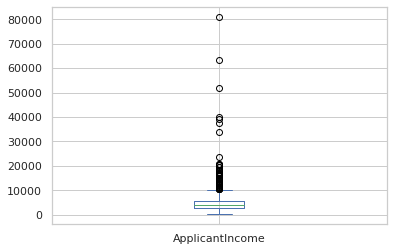

In [13]:
# Numerical Analysis

loan_data['ApplicantIncome'].plot.box() 

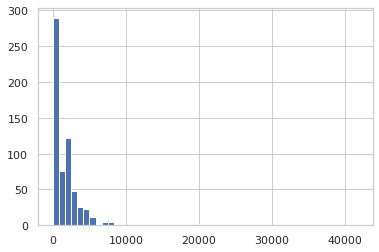

In [14]:
loan_data['CoapplicantIncome'].hist(bins=50)

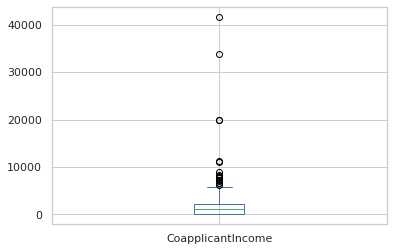

In [15]:
loan_data['CoapplicantIncome'].plot.box() 

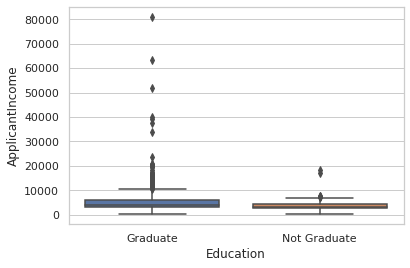

In [16]:
sns.boxplot(x="Education", y="ApplicantIncome", data=loan_data)

**Bivariate Analysis**

Categorical Independent Variable vs Target Variable

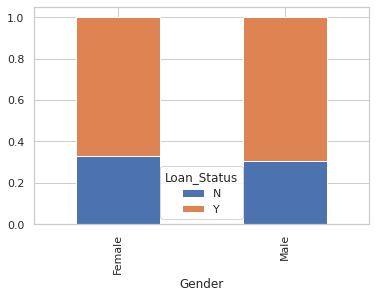

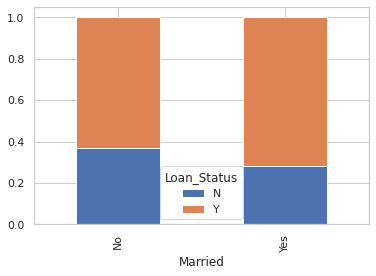

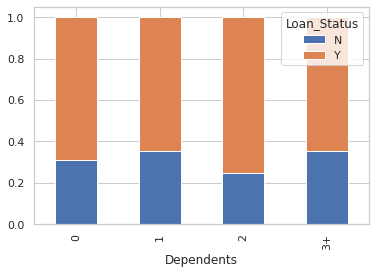

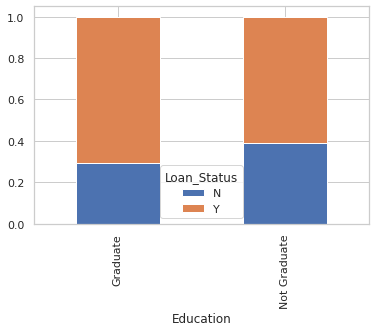

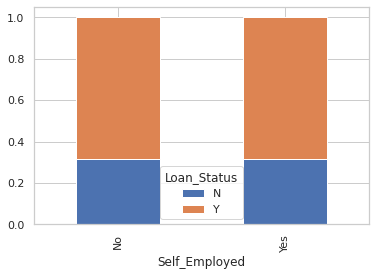

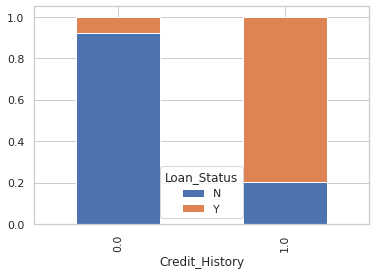

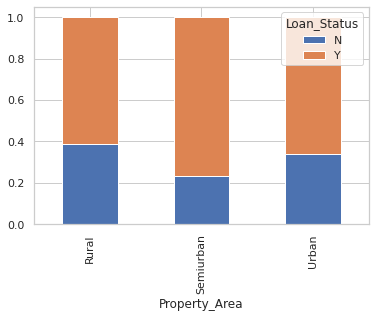

In [17]:
GenderTarget=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status']) 
GenderTarget.div(GenderTarget.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 

Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 

Education=pd.crosstab(loan_data['Education'],loan_data['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])  
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])  
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Property_Area=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])  
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Numerical Independent Variable vs Target Variable

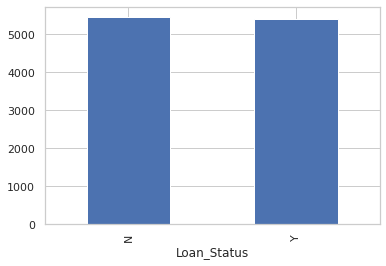

In [18]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

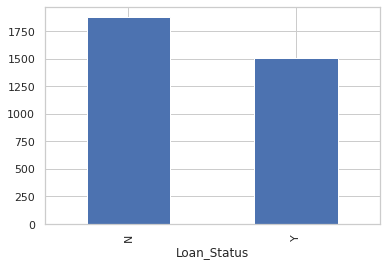

In [19]:
loan_data.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

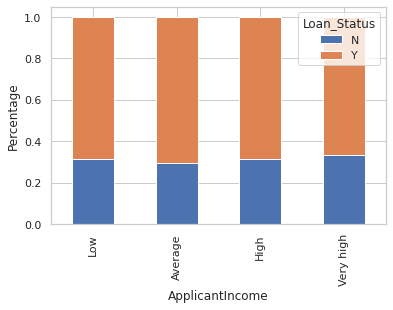

In [20]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

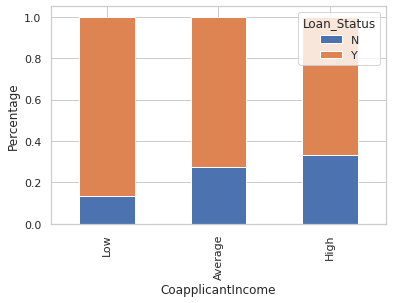

In [21]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
loan_data['Coapplicant_Income_bin']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

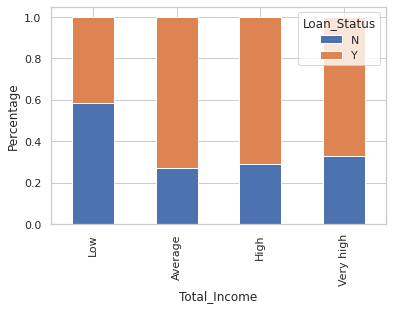

In [22]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
loan_data['Total_Income_bin']=pd.cut(loan_data['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(loan_data['Total_Income_bin'],loan_data['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


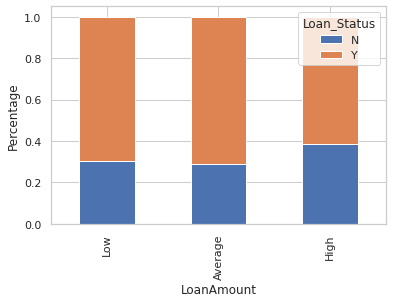

In [23]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
loan_data['LoanAmount_bin']=pd.cut(loan_data['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(loan_data['LoanAmount_bin'],loan_data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [24]:
loan_data.drop("Income_bin", axis=1,inplace=True,errors='ignore')
loan_data.drop("Coapplicant_Income_bin", axis=1,inplace=True,errors='ignore')

loan_data.drop("Total_Income_bin", axis=1,inplace=True,errors='ignore')
loan_data.drop("LoanAmount_bin", axis=1,inplace=True,errors='ignore')

# Plot the Observations

Pearson Technique

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pearsoncorr = loan_data.corr(method='pearson')
pearsoncorr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.015109
Total_Income,0.893037,0.342781,0.624621,-0.069948,-0.015109,1.000000


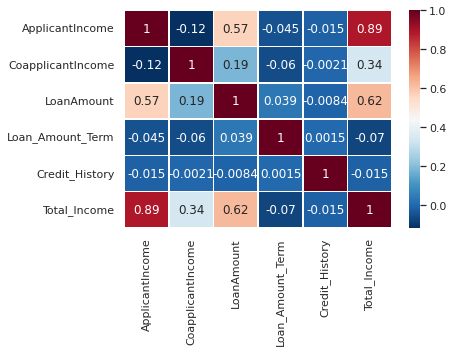

In [26]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Kendali Technique

In [27]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

# Data Visualisation Settings 
%matplotlib inline
sb.set_style('whitegrid')

kendall = loan_data.corr(method='kendall')
kendall

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.230222,0.371769,-0.032096,0.035356,0.553892
CoapplicantIncome,-0.230222,1.000000,0.187174,-0.011730,-0.006507,0.268271
LoanAmount,0.371769,0.187174,1.000000,0.033096,-0.001937,0.542809
Loan_Amount_Term,-0.032096,-0.011730,0.033096,1.000000,0.014733,-0.046793
Credit_History,0.035356,-0.006507,-0.001937,0.014733,1.000000,0.017544
Total_Income,0.553892,0.268271,0.542809,-0.046793,0.017544,1.000000


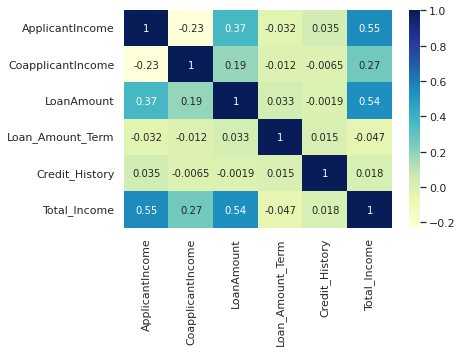

In [28]:
sb.heatmap(kendall, 
           xticklabels=kendall.columns.values, 
           yticklabels=kendall.columns.values, 
           cmap="YlGnBu",
          annot=True)

Speearman Technique

In [29]:
spearman = loan_data.corr(method='spearman')
spearman

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241,0.705377
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458,0.323799
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361,0.702424
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088,-0.057887
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000,0.021463
Total_Income,0.705377,0.323799,0.702424,-0.057887,0.021463,1.000000


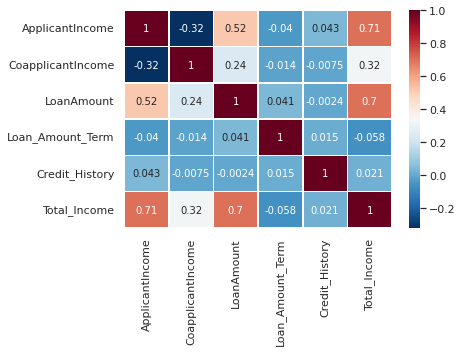

In [30]:
sb.heatmap(spearman, 
            xticklabels=spearman.columns,
            yticklabels=spearman.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Evaluation

In [31]:
#Drop unwanted columns in train data

loan_data.drop("Loan_ID", axis=1,inplace=True,errors='ignore')
loan_data.drop("Loan_Amount_Term", axis=1,inplace=True,errors='ignore')
loan_data.drop("Total_Income", axis=1,inplace=True,errors='ignore')
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y


In [32]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

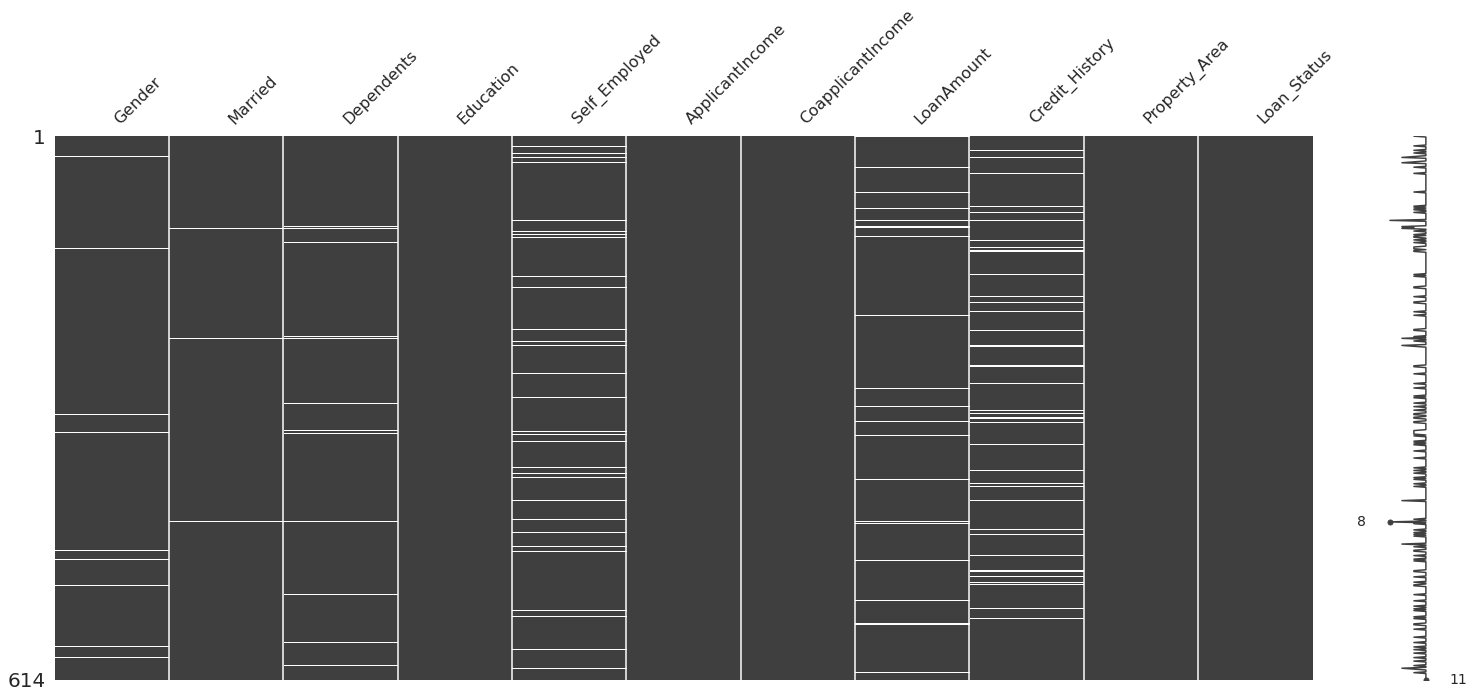

In [33]:
msno.matrix(loan_data)
plt.show()

In [34]:
## Imputing the missing values

for i in [loan_data]:
  i["Gender"] = i["Gender"].fillna(loan_data.Gender.dropna().mode()[0])
  i["Married"] = i["Married"].fillna(loan_data.Married.dropna().mode()[0])
  i["Dependents"] = i["Dependents"].fillna(loan_data.Dependents.dropna().mode()[0])
  i["Self_Employed"] = i["Self_Employed"].fillna(loan_data.Self_Employed.dropna().mode()[0])
  i["Credit_History"] = i["Credit_History"].fillna(loan_data.Credit_History.dropna().mode()[0])

In [35]:
# loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

In [36]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
from urllib import error
loan_data["Loan_Status"] = loan_data["Loan_Status"].map({'N':0, "Y":1}).astype(int)

# convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [38]:
loan_data["Dependents"] = loan_data["Dependents"].map({"3+":'3', "3":'3', "2":'2', "1":'1',"0":'0'})

In [39]:
loan_data['Dependents'] = loan_data['Dependents'].astype('int')

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
target_column = ['Loan_Status'] 
predictors = list(set(list(loan_data.columns))-set(target_column))

print(target_column)
print(predictors)

['Loan_Status']
['Education', 'CoapplicantIncome', 'LoanAmount', 'Gender', 'Self_Employed', 'Credit_History', 'Married', 'ApplicantIncome', 'Property_Area', 'Dependents']


In [42]:
# X = loan_data[predictors].values
X = loan_data.drop('Loan_Status',1)
# y = loan_data[target_column].values
y = loan_data.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape); print(X_test.shape)


(429, 10)
(185, 10)


<ipython-input-42-e026efc6e9df>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = loan_data.drop('Loan_Status',1)


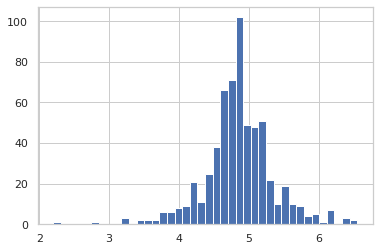

In [43]:
# Outlier treatment

loan_data['LoanAmount'] = np.log(loan_data['LoanAmount']) 
loan_data['LoanAmount'].hist(bins=40)

<function matplotlib.pyplot.show(*args, **kw)>

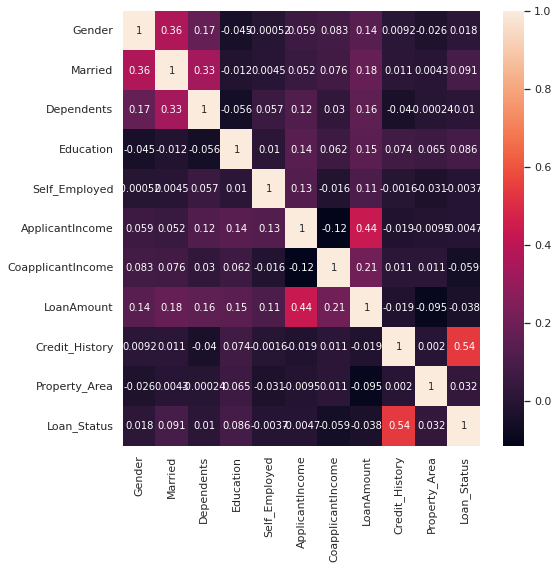

In [44]:
plt.figure(figsize=(8,8))
correlation_matrix=loan_data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

In [45]:
for i in loan_data.columns[1:]:
    loan_data[i] = (loan_data[i] - loan_data[i].min()) / (loan_data[i].max() - loan_data[i].min())

In [46]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.609760,1.0,1.0,1.0
1,1,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.609760,1.0,0.0,0.0
2,1,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.457624,1.0,1.0,1.0
3,1,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.594936,1.0,1.0,1.0
4,1,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.631977,1.0,1.0,1.0


# Classifiers

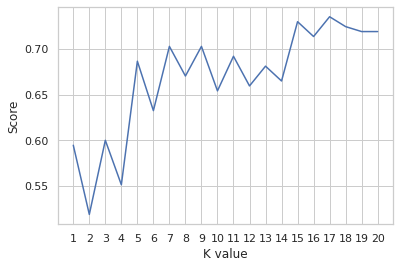

KNN best accuracy: 73.51%


In [47]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [48]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('Accuracy is',accuracy_score(y_predict,y_test)*100)
print('')

              precision    recall  f1-score   support

           0       0.86      0.44      0.59        54
           1       0.81      0.97      0.88       131

    accuracy                           0.82       185
   macro avg       0.83      0.71      0.73       185
weighted avg       0.82      0.82      0.80       185

Accuracy is 81.62162162162161



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
model_multi=MultinomialNB()
model_multi.fit(X_train,y_train)

MultinomialNB()

In [50]:
model_multi.score(X_test,y_test)

0.5135135135135135

In [51]:
pred_multi=model_multi.predict(X_test)

In [52]:
precis_multi=metrics.precision_score(pred_multi,y_test,average=None)
recal_multi=metrics.recall_score(pred_multi,y_test,average=None)
f1_multi=metrics.f1_score(pred_multi,y_test,average=None)
print("MultinomialNB Precision={},recall={},f1={}".format(precis_multi,recal_multi,f1_multi))

MultinomialNB Precision=[0.46296296 0.53435115],recall=[0.29069767 0.70707071],f1=[0.35714286 0.60869565]


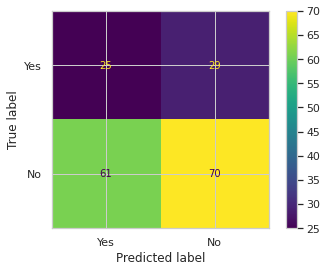

In [53]:
cm_multi =metrics.confusion_matrix(y_test,pred_multi,labels=model_multi.classes_)
disp_multi=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_multi,display_labels=['Yes','No'])
disp_multi.plot()

In [54]:
TP = cm_multi[1][1]
TN = cm_multi[0][0]    
FP = cm_multi[0][1]   
FN = cm_multi[1][0]


In [55]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
# calculate recall
conf_recall =(TN/(FN+TN))


In [56]:
print(f'Accuracy: {round(conf_accuracy,2)}')     
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')
print(f'Recall Score: {round(conf_recall,2)}')

Accuracy: 0.51
Sensitivity: 0.53
Specificity: 0.46
Precision: 0.46
f_1 Score: 0.5
Recall Score: 0.29


ROC AUC USING LOG REG MODEL

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)    # model fitting
y_pred = logreg.predict(X_test)   # Predictions

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
y_test.shape

(185,)

In [59]:
pred_proba = [i[1] for i in logreg.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})


In [60]:
plt.figure(figsize = (10,7))

thresholds = np.linspace(0, 1, 200)

<Figure size 720x504 with 0 Axes>

In [61]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

In [62]:
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

In [63]:
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

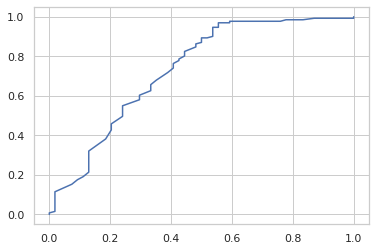

In [64]:
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

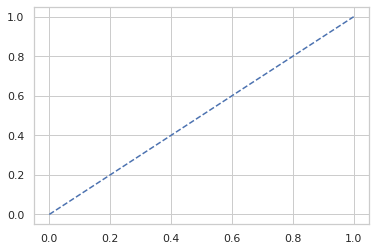

In [65]:
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

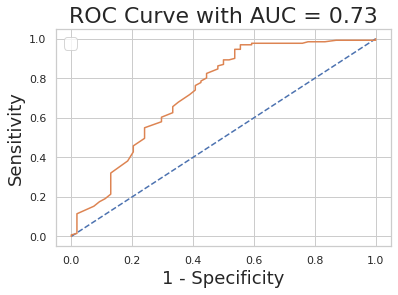

In [66]:
# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')


In [67]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.53      0.54      0.53        54
           1       0.81      0.80      0.80       131

    accuracy                           0.72       185
   macro avg       0.67      0.67      0.67       185
weighted avg       0.73      0.72      0.73       185

72.43% Accurate


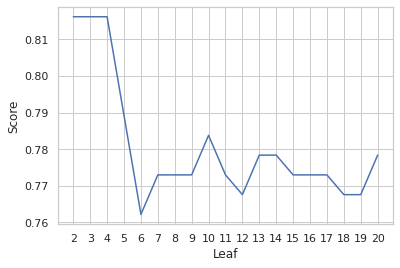

Decision Tree Accuracy: 81.62%


In [68]:
# Decision Tree - Implementation 2

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [69]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.80      0.44      0.57        54
           1       0.81      0.95      0.87       131

    accuracy                           0.81       185
   macro avg       0.80      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185

80.54% Accurate


In [70]:
# XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")
print('')

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        54
           1       0.81      0.98      0.89       131

    accuracy                           0.82       185
   macro avg       0.85      0.71      0.74       185
weighted avg       0.83      0.82      0.80       185

82.16% Accurate



I tried fine-tuning it to improve my accuracy score using GridSearchCV.

In [71]:
from sklearn.model_selection import GridSearchCV

LRparam_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

LR_search = GridSearchCV(LogisticRegression(), LRparam_grid, refit = True, verbose =3, cv=5)
LR_search.fit(X_train, y_train)
LR_search.best_params_

print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_) 

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, pena

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=lb

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=sag

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.2s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, pena

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l1, solver=lbf

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.3s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, pena

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=lb

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, pena

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=liblinear;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, pena

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=lb

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penal

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=lb

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, pena

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solve

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 


[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solv

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.686 total ti

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.776 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.651 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.826 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total ti

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.651 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.826 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, s

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.651 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.826 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, sc

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.651 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.826 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.651 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.826 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, sc

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814

[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ di

[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] E

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.800 total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] EN

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.800 total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] E

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.2s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.756 total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.3s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.3s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.3s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.686 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.674 total 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.2s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.756 total ti

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.2s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.2s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total tim

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=libline

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.6

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=libline

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=lbfgs;, score=nan tota

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=libline

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan tota

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=libline

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=libline

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=libline

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=na

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.674 to

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.674 to

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not conv

[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.682 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The l

[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=liblinear;

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.674 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.682 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.1s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.682 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.2s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.2s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.756 total time=   0.2s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, sol

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.674 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.682 total time=   0.1s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.674 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.682 total time=   0.1s
Mean Accuracy: 0.807
Config: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
735 fits failed out of a total of 2450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fi

In [72]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'ML Models': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,ML Models,Score
2,XGBoost,0.821622
3,Logistic Regression,0.816216
1,Random Forest,0.805405
0,Decision Tree,0.724324


# Implementation 1 - Adam Optimizer



Epoch 1/50
14/14 [==============================] - 1s 19ms/step - loss: 9.9719 - accuracy: 0.3537 - val_loss: 5.7574 - val_accuracy: 0.2903
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 3.2961 - accuracy: 0.3628 - val_loss: 1.1361 - val_accuracy: 0.3065
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.9148 - accuracy: 0.5918 - val_loss: 0.8685 - val_accuracy: 0.6452
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.8554 - accuracy: 0.6803 - val_loss: 0.6871 - val_accuracy: 0.6935
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7166 - accuracy: 0.6304 - val_loss: 0.6889 - val_accuracy: 0.5161
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.6644 - val_loss: 0.6408 - val_accuracy: 0.6935
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6848 - val_loss: 0.6500 - val_accuracy: 0.6935
Epoch 8/50
14/14 [=

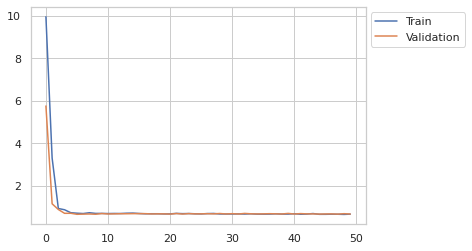

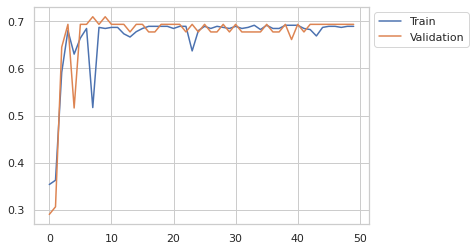

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=loan_data['Loan_Status'], random_state = 42)
# Train & Valid Data - 90%
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

# Creating a skeleton of model.
from keras.models import Sequential
# Defining layers
from keras.layers import Input, Dense
from tensorflow.keras.layers import InputLayer
import tensorflow as tf


# Input neurons
input_neurons = X_train.shape[1]
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 10
neuron_hidden_layer_2         = 5
neuron_hidden_layer_3         = 5
neuron_hidden_layer_4         = 5
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

X_train =  X_train[:441]
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

# Getting predictions for the test set

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

from sklearn.metrics import accuracy_score
print("Accuracy_Score : {}".format(accuracy_score(classes_x, y_test) * 100))

prediction1 = model.predict(x_val)
classes1=np.argmax(prediction1,axis=1)
print("Accuracy_Score : {}".format(accuracy_score(classes1, y_val) * 100))

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['Train','Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['Train','Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Implementation 2 - SGD Optimizer

In [83]:
X = loan_data[predictors].values
y = loan_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
print(X_train.shape); print(X_test.shape)

(429, 10)
(185, 10)


In [84]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [85]:
class ANN(nn.Module):
    def __init__(self, input_dim = 10, output_dim = 1):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 32)
        self.output_layer = nn.Linear(32,1)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output_layer(x)
        
        return nn.Sigmoid()(x)

In [86]:
model = ANN(input_dim = 10, output_dim = 1)

print(model)

ANN(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [87]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).view(-1,1)


X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).view(-1,1)

In [88]:
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)

train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [89]:
import torch.optim as optim
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay= 1e-6, momentum = 0.8)

Epoch: 1 	Training Loss: 0.6870	 Acc: 67.13%
Epoch: 2 	Training Loss: 0.6860	 Acc: 67.13%
Epoch: 3 	Training Loss: 0.6844	 Acc: 67.13%
Epoch: 4 	Training Loss: 0.6833	 Acc: 67.13%
Epoch: 5 	Training Loss: 0.6821	 Acc: 67.13%
Epoch: 6 	Training Loss: 0.6809	 Acc: 67.13%
Epoch: 7 	Training Loss: 0.6791	 Acc: 67.13%
Epoch: 8 	Training Loss: 0.6782	 Acc: 67.13%
Epoch: 9 	Training Loss: 0.6770	 Acc: 67.13%
Epoch: 10 	Training Loss: 0.6757	 Acc: 67.13%
Epoch: 11 	Training Loss: 0.6750	 Acc: 67.13%
Epoch: 12 	Training Loss: 0.6737	 Acc: 67.13%
Epoch: 13 	Training Loss: 0.6726	 Acc: 67.13%
Epoch: 14 	Training Loss: 0.6716	 Acc: 67.13%
Epoch: 15 	Training Loss: 0.6708	 Acc: 67.13%
Epoch: 16 	Training Loss: 0.6700	 Acc: 67.13%
Epoch: 17 	Training Loss: 0.6687	 Acc: 67.13%
Epoch: 18 	Training Loss: 0.6681	 Acc: 67.13%
Epoch: 19 	Training Loss: 0.6671	 Acc: 67.13%
Epoch: 20 	Training Loss: 0.6658	 Acc: 67.13%
Epoch: 21 	Training Loss: 0.6655	 Acc: 67.13%
Epoch: 22 	Training Loss: 0.6645	 Acc: 67.1

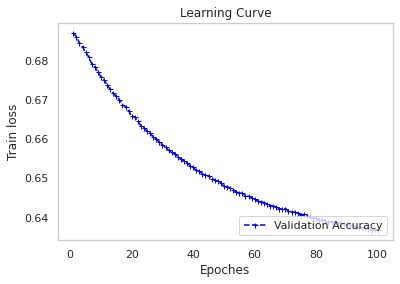

In [90]:
# lines 1 to 6
epochs = 100
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

# lines 7 onwards
model.train() # prepare model for training

for epoch in range(epochs):
    trainloss = 0.0
    valloss = 0.0
    
    correct = 0
    total = 0
    for data,target in train_loader:
        data = Variable(data).float()
        target = Variable(target).type(torch.FloatTensor)
        optimizer.zero_grad()
        output = model(data)
        predicted = (torch.round(output.data[0]))
        total += len(target)
        correct += (predicted == target).sum()

        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        trainloss += loss.item()*data.size(0)

    train_loss = trainloss/len(train_loader.dataset)
    accuracy = 100 * correct / float(total)
    train_acc_list.append(accuracy)
    train_loss_list.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.4f}\t Acc: {:.2f}%'.format(
        epoch+1, 
        train_loss,
        accuracy
        ))
    epoch_list.append(epoch + 1)

# plt.plot(train_loss_list)
# plt.plot(epoch_list)
# plt.legend(['Train','Validation'], loc='upper left', bbox_to_anchor=(1,1))
# plt.show()

# print(val_loss_list)

plt.plot(epoch_list, train_loss_list, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
# plt.fill_between(epoch_list, train_loss_list, alpha=0.15, color='blue')
# plt.plot(epoch_list, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
# plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

plt.title('Learning Curve')
plt.xlabel('Epoches')
plt.ylabel('Train loss')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [91]:
correct = 0
total = 0
valloss = 0
model.eval() 

with torch.no_grad():
    for data, target in test_loader:
        data = Variable(data).float()
        target = Variable(target).type(torch.FloatTensor)

        output = model(data)
        loss = loss_fn(output, target)
        valloss += loss.item()*data.size(0)
        
        predicted = (torch.round(output.data[0]))
        total += len(target)
        correct += (predicted == target).sum()
    
    valloss = valloss/len(test_loader.dataset)
    accuracy = 100 * correct/ float(total)
    print(accuracy)

tensor(72.4324)
